In [1]:
from itertools import chain
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from pathlib import Path
from time import time
#from simce.utils import dic_img_preg
import pandas as pd
from matplotlib import cm


In [2]:
%cd ".."

c:\Users\jmpreussa\Documents\simce


c:\Users\jmpreussa\Documents\simce\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Preguntas

In [ ]:
# load image
preg = r'data\\input\\cuestionario_estudiantes\\09955\\4272452_3.jpg'
img_preg = cv2.imread(str(preg),1)
        

In [ ]:
media_img = img_preg

### Subpreguntas

probar segmentacion de imagen por bloques segun linea

In [3]:
# Funciones ---------------------------------------------------------------------

### Procesamiento imagen

def recorte_imagen(img_preg, x0 =130, x1= 30, y0 = 50, y1=50):
    """Funcion para recortar margenes de las imagenes

    Args:
        img_preg (array imagen): _description_
        x0 (int, optional): _description_. Defaults to 130.
        x1 (int, optional): _description_. Defaults to 30.
        y0 (int, optional): _description_. Defaults to 50.
        y1 (int, optional): _description_. Defaults to 50.

    Returns:
        (array imagen): imagen cortada
    """
    
    x,y = img_preg.shape[:2]
    img_crop = img_preg[x0:x-x1, y0:y-y1]
    return img_crop


def procesamiento_color(img_crop):
    """
    Funcion que procesa el color de la imagen

    Args:
        img_crop (_type_): imagen recortada

    Returns:
        canny image 
    """
    # transformando color
    gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    # blur = cv2.GaussianBlur(gray, (5, 5), 0)
    Canny = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    return Canny


### Procesamiento sub-pregunta

def obtener_puntos(img_crop_canny, threshold = 100, minLineLength = 100):
    """
    Funcion que identifica lineas para obtener puntos en el eje "y" para realizar el recorte a subpreguntas

    Args:
        img_crop_canny (_type_): _description_

    Returns:
        lines: _description_
    """
    # obteniendo lineas
    lines = cv2.HoughLinesP(img_crop_canny, 1, np.pi/180, threshold= threshold, minLineLength = minLineLength)
    
    indices_ordenados = np.argsort(lines[:, :, 1].flatten())
    lines_sorted = lines[indices_ordenados]
    
    puntoy = list(set(chain.from_iterable(lines_sorted[:, :,1].tolist())))
    puntoy.append(img_crop_canny.shape[0])
    puntoy = sorted(puntoy)
    
    print(puntoy)
    
    y = []
    for i in range(len(puntoy)-1):
        if puntoy[i+1]- puntoy[i]<35:
            y.append(i+1)

    print(puntoy)
    print(y)
    
    for index in sorted(y, reverse=True):
        del puntoy[index]
    
    return puntoy

In [4]:
preg = r'data\output\09952\4272352_3_5.jpg' #r'data\output\09952\4272386_6_3.jpg'
img_preg = cv2.imread(str(preg),1)

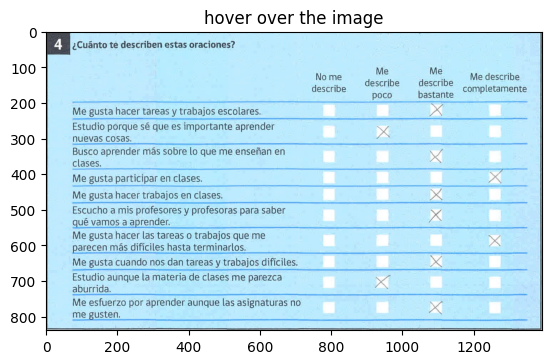

In [5]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(img_preg, cmap=cm.jet)

ax.set_title('hover over the image')

plt.show()

In [6]:
img_crop = recorte_imagen(img_preg)
media_img = img_crop

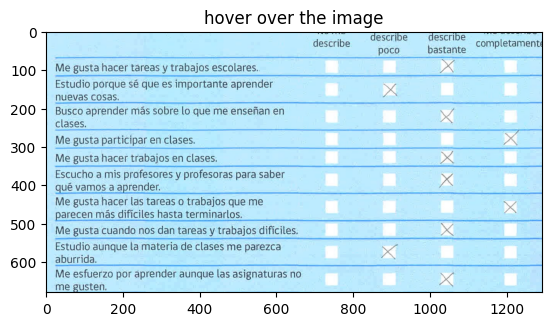

In [7]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(media_img, cmap=cm.jet)

ax.set_title('hover over the image')

plt.show()

In [8]:
media_img = procesamiento_color(media_img)

In [9]:
## VIZ
lines = cv2.HoughLinesP(media_img, 1, np.pi/180, threshold= 100, minLineLength = 100)
for l in lines:
    for x,y,w,h in l:
        cv2.line(img_crop,(x,y),(w,h),(0,255,0),2)
 
cv2.imwrite('imagen_con_lineas.jpg', img_crop)


True

In [10]:
puntoy = obtener_puntos(media_img)

[67, 70, 114, 115, 117, 118, 185, 188, 255, 256, 258, 259, 303, 305, 306, 350, 353, 424, 491, 494, 537, 539, 540, 607, 610, 679]
[67, 70, 114, 115, 117, 118, 185, 188, 255, 256, 258, 259, 303, 305, 306, 350, 353, 424, 491, 494, 537, 539, 540, 607, 610, 679]
[1, 3, 4, 5, 7, 9, 10, 11, 13, 14, 16, 19, 21, 22, 24]


In [11]:
len(puntoy)

11

In [13]:
n = 1
for i in range(len(puntoy)-1):
    cropped_img = img_crop[puntoy[i]:puntoy[i+1],]
    y0 = i
    
    page = 'Subpregunta'
    id_img = f'{page}_{n}'
    n += 1
    file_out = f'{id_img}.jpg'
    print(file_out)
    
    cv2.imwrite(file_out, cropped_img)

sep_test_1.jpg
sep_test_2.jpg
sep_test_3.jpg
sep_test_4.jpg
sep_test_5.jpg
sep_test_6.jpg
sep_test_7.jpg
sep_test_8.jpg
sep_test_9.jpg
sep_test_10.jpg


In [27]:
r'data\output\09952\4272386_5_4.jpg'.split('\\')[3].replace('.jpg', '')

'4272386_5_4'

Proceso ordenado

In [1]:
%cd ".."

c:\Users\jmpreussa\Documents\simce


In [2]:
import numpy as np
import cv2
import pandas 
from time import time

import simce.functions as func

In [3]:
preguntas_ejemplo = func.ls(r'data\output\09952')

In [4]:
folder = 'Subpreguntas'

In [5]:
now = time()

revisar_pregunta = []           # revisar en que preguntas se cae

for pregunta in preguntas_ejemplo:
    
    id_pregunta = pregunta.split('\\')
    preg = id_pregunta[-1].replace('.jpg', '')
    print('Revisando pregunta ' + id_pregunta[3])
    
    try:
        img_preg = cv2.imread(str(pregunta),1)
        img_crop = func.recorte_imagen(img_preg)
        img_crop_col = func.procesamiento_color(img_crop)
        
        puntoy = func.obtener_puntos(img_crop_col)
        
        n = 1 # id subpregunta
        try:
            for i in range(len(puntoy)-1):
                cropped_img = img_crop[puntoy[i]:puntoy[i+1],]
                
                page = 'Subpreg'
                id_img = f'{id_pregunta[-2]}_{preg}_{page}_{n}'
                n += 1
                file_out = f'data/output/{folder}/{id_img}.jpg'
                print(file_out)
                
                cv2.imwrite(file_out, cropped_img)
                
        except Exception as e:
            print('Ups, ocurrió un error al recortar la imagen con subpregunta ' + str(n))
            print(e)
            revisar_pregunta.append(pregunta+ '__'+ str(n))
            
    except Exception as e:
        
        print('Ups, ocurrió un error con la pregunta ' + pregunta)
        print(e)
        revisar_pregunta.append(pregunta)
        
print(time() - now)

Revisando pregunta Documents
Ups, ocurrió un error con la pregunta c:\Users\jmpreussa\Documents\simce\data\output\09952\4272352_1_0.jpg
OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Revisando pregunta Documents
[36, 38, 39, 83, 86, 153, 154, 156, 157, 201]
[36, 38, 39, 83, 86, 153, 154, 156, 157, 201]
[1, 2, 4, 6, 7, 8]
data/output/Subpreguntas/09952_4272352_1_1_Subpreg_1.jpg
data/output/Subpreguntas/09952_4272352_1_1_Subpreg_2.jpg
data/output/Subpreguntas/09952_4272352_1_1_Subpreg_3.jpg
Revisando pregunta Documents
[35, 38, 39, 137, 138, 140, 208]
[35, 38, 39, 137, 138, 140, 208]
[1, 2, 4, 5]
data/output/Subpreguntas/09952_4272352_1_2_Subpreg_1.jpg
data/output/Subpreguntas/09952_4272352_1_2_Subpreg_2.jpg
Revisando pregunta Documents
[59, 60, 62, 63, 114, 115, 117, 118, 169, 170, 172, 173, 224, 226]
[59, 60, 62, 63, 114, 115, 117, 118, 169, 170, 172, 173, 224, 226]
[1, 2,

In [6]:
revisar_pregunta

['c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272352_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272352_2_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272354_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272354_2_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272358_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272358_2_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272362_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272362_2_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272369_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272369_2_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272374_1_0.jpg',
 'c:\\Users\\jmpreussa\\Documents\\simce\\data\\output\\09952\\4272374_2_0.jpg',
 'c:\\Users\\jmpreussa\\Docu